In [108]:
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
import wbdata
import datetime
import seaborn as sns

In [41]:
data_date = (datetime.datetime(2016, 1, 1), datetime.datetime(2016, 12, 31))
indicators = {'AG.LND.FRST.ZS' : 'Forest area (% of land area)'}

forest = wbdata.get_dataframe(indicators, country=u'all',data_date=data_date,
                              convert_date=False, keep_levels=False)

In [42]:
forest[35:50]

,Forest area (% of land area)
country,
Other small states,25.986786
Pacific island small states,61.555294
Post-demographic dividend,31.694723
Pre-demographic dividend,28.171760
Small states,36.458545
South Asia,17.505864
South Asia (IDA & IBRD),17.505864
Sub-Saharan Africa,27.555156
Sub-Saharan Africa (excluding high income),27.553838


In [43]:
forest = forest.reset_index(drop=False)
forest.head()

,country,Forest area (% of land area)
0,Arab World,1.682361
1,Caribbean small states,85.033445
2,Central Europe and the Baltics,34.251720
3,Early-demographic dividend,21.850907
4,East Asia & Pacific,26.359846


In [44]:
row = forest.loc[forest['country'] == 'World'].index.item()
row

/home/jan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


46

In [45]:
forest = forest[47:]
forest = forest.reset_index(drop=True)
forest.head()

,country,Forest area (% of land area)
0,Afghanistan,2.067825
1,Albania,28.121897
2,Algeria,0.824439
3,American Samoa,87.500000
4,Andorra,34.042553


In [46]:
data_date = (datetime.datetime(2016, 1, 1), datetime.datetime(2016, 12, 31))
indicators = {'SP.URB.TOTL.IN.ZS' : 'Urban population (% of total population)'}

urbanization = wbdata.get_dataframe(indicators, country=u'all',data_date=data_date,
                              convert_date=False, keep_levels=False)

In [47]:
urbanization = urbanization.reset_index(drop=False)
urbanization.head()

,country,Urban population (% of total population)
0,Arab World,58.345275
1,Caribbean small states,50.906393
2,Central Europe and the Baltics,62.184479
3,Early-demographic dividend,44.327768
4,East Asia & Pacific,57.321459


In [48]:
row = urbanization.loc[urbanization['country'] == 'World'].index.item()
row

/home/jan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


46

In [49]:
urbanization = urbanization[47:]
urbanization = urbanization.reset_index(drop=True)
print(urbanization.shape)
urbanization.head()

(217, 2)


,country,Urban population (% of total population)
0,Afghanistan,25.020
1,Albania,58.421
2,Algeria,71.459
3,American Samoa,87.198
4,Andorra,88.248


In [60]:
deforestation.shape

(217, 3)

In [50]:
deforestation = urbanization.merge(forest)

In [51]:
deforestation = deforestation.rename(columns={"Urban population (% of total population)": "urban", 
                              "Forest area (% of land area)":"forest_area"})

In [52]:
deforestation['urban'].corr(deforestation['forest_area'])

8.7478141845665e-05

In [53]:
deforestation.corr(method='pearson')

,urban,forest_area
urban,1.000000,0.000087
forest_area,0.000087,1.000000


In [54]:
deforestation.corr(method='kendall')

,urban,forest_area
urban,1.000000,-0.002205
forest_area,-0.002205,1.000000


In [55]:
deforestation.corr(method='spearman')

,urban,forest_area
urban,1.000000,-0.010294
forest_area,-0.010294,1.000000


In [62]:
#print(deforestation.shape)
deforestation.head(10)

,country,urban,forest_area
0,Afghanistan,25.020,2.067825
1,Albania,58.421,28.121897
2,Algeria,71.459,0.824439
3,American Samoa,87.198,87.500000
4,Andorra,88.248,34.042553
5,Angola,64.149,46.307210
6,Antigua and Barbuda,24.846,22.272728
7,Argentina,91.627,9.798406
8,Armenia,63.082,11.668423
9,Aruba,43.192,2.333333


In [ ]:
# The part analyzing suicides:

In [61]:
# Read data
suicide_all = pd.read_csv('master.csv')
year2 = suicide_all[(2014==(suicide_all['year']))]
refine2 = year2.drop(columns=['HDI for year','generation','country-year'])
collapse2 = refine2.drop(columns=['sex','age'])
collapse2 = collapse2.rename(columns={'gdp_for_year ($)':'gdp USD', 'gdp_per_capita ($)':'gdp_per_capita USD'})
collapse2 = collapse2.groupby(['country', 'year','gdp_per_capita USD'], as_index=False).agg({'suicides_no':'sum', 'population':'sum', 'suicides/100k pop':'mean'})

collapse2 = collapse2.groupby(['country', 'year','gdp_per_capita USD'], as_index=False).agg({'suicides_no':'sum', 'population':'sum', 'suicides/100k pop':'mean'})
collapse2.head(10)

,country,year,gdp_per_capita USD,suicides_no,population,suicides/100k pop
0,Antigua and Barbuda,2014,14093,0,90837,0.000000
1,Argentina,2014,13400,3231,39276555,9.279167
2,Armenia,2014,4142,58,2803029,3.084167
3,Australia,2014,66809,2891,21927587,12.422500
4,Austria,2014,54278,1314,8141165,17.485000
5,Bahrain,2014,27503,9,1213966,0.543333
6,Belarus,2014,8849,1741,8906977,21.075833
7,Belgium,2014,50173,1899,10578848,16.820833
8,Belize,2014,5448,24,312780,7.579167
9,Bosnia and Herzegovina,2014,5079,313,3654169,9.125000


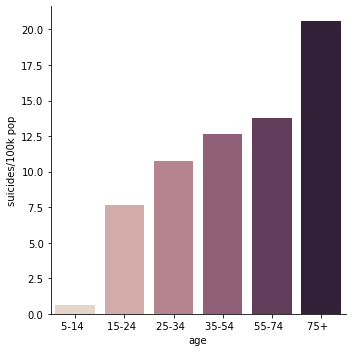

In [138]:
import re
agegroups = year2.groupby(['age', 'year'], as_index=False).agg({'suicides/100k pop':'mean'})
agegroups = agegroups.replace(regex='years$', value=' ')
agegroups = agegroups.sort_values("suicides/100k pop", ascending = True)
sns.catplot(x="age", y="suicides/100k pop", kind="bar", palette="ch:.130", data=agegroups);

In [141]:
cou

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,gdp_per_capita USD,urban,forest_area,Happiness Score,Region,Happiness Rank


In [63]:
fuse = collapse2.merge(deforestation)

In [67]:
fuse

,country,year,gdp_per_capita USD,suicides_no,population,suicides/100k pop,urban,forest_area
0,Antigua and Barbuda,2014,14093,0,90837,0.000000,24.846,22.272728
1,Argentina,2014,13400,3231,39276555,9.279167,91.627,9.798406
2,Armenia,2014,4142,58,2803029,3.084167,63.082,11.668423
3,Australia,2014,66809,2891,21927587,12.422500,85.800,16.258278
4,Austria,2014,54278,1314,8141165,17.485000,57.905,46.905713
...,...,...,...,...,...,...,...,...
68,Ukraine,2014,3299,7968,40464165,20.875000,69.154,16.708039
69,United Kingdom,2014,49906,4788,60570482,6.994167,82.886,13.065763
70,United States,2014,58531,42769,297749735,14.277500,81.862,33.929786
71,Uruguay,2014,18012,591,3177645,20.720000,95.144,10.671580


In [65]:
fuse.shape

(73, 8)

In [81]:
data = pd.read_csv('2016.csv')
data2 = data.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
data3 = data2.rename(columns={'Country':'country'})
data3.head()

,country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [82]:
fuseall = fuse.merge(data3)
fuseall

,country,year,gdp_per_capita USD,suicides_no,population,suicides/100k pop,urban,forest_area,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Argentina,2014,13400,3231,39276555,9.279167,91.627,9.798406,Latin America and Caribbean,26,6.650,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985
1,Armenia,2014,4142,58,2803029,3.084167,63.082,11.668423,Central and Eastern Europe,121,4.360,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864
2,Australia,2014,66809,2891,21927587,12.422500,85.800,16.258278,Australia and New Zealand,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
3,Austria,2014,54278,1314,8141165,17.485000,57.905,46.905713,Western Europe,12,7.119,1.45038,1.08383,0.80565,0.54355,0.21348,0.32865,2.69343
4,Bahrain,2014,27503,9,1213966,0.543333,89.090,0.784062,Middle East and Northern Africa,42,6.218,1.44024,0.94397,0.65696,0.47375,0.25772,0.17147,2.27405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Ukraine,2014,3299,7968,40464165,20.875000,69.154,16.708039,Central and Eastern Europe,123,4.324,0.87287,1.01413,0.58628,0.12859,0.01829,0.20363,1.50066
63,United Kingdom,2014,49906,4788,60570482,6.994167,82.886,13.065763,Western Europe,23,6.725,1.40283,1.08672,0.80991,0.50036,0.27399,0.50156,2.14999
64,United States,2014,58531,42769,297749735,14.277500,81.862,33.929786,North America,13,7.104,1.50796,1.04782,0.77900,0.48163,0.14868,0.41077,2.72782
65,Uruguay,2014,18012,591,3177645,20.720000,95.144,10.671580,Latin America and Caribbean,29,6.545,1.18157,1.03143,0.72183,0.54388,0.21394,0.18056,2.67139


In [88]:
important = fuseall[['country', 'gdp_per_capita USD', 'suicides/100k pop', 'urban', 'forest_area', 'Happiness Score', 'Region', 'Happiness Rank']]
important

,country,gdp_per_capita USD,suicides/100k pop,urban,forest_area,Happiness Score,Region,Happiness Rank
0,Argentina,13400,9.279167,91.627,9.798406,6.650,Latin America and Caribbean,26
1,Armenia,4142,3.084167,63.082,11.668423,4.360,Central and Eastern Europe,121
2,Australia,66809,12.422500,85.800,16.258278,7.313,Australia and New Zealand,9
3,Austria,54278,17.485000,57.905,46.905713,7.119,Western Europe,12
4,Bahrain,27503,0.543333,89.090,0.784062,6.218,Middle East and Northern Africa,42
...,...,...,...,...,...,...,...,...
62,Ukraine,3299,20.875000,69.154,16.708039,4.324,Central and Eastern Europe,123
63,United Kingdom,49906,6.994167,82.886,13.065763,6.725,Western Europe,23
64,United States,58531,14.277500,81.862,33.929786,7.104,North America,13
65,Uruguay,18012,20.720000,95.144,10.671580,6.545,Latin America and Caribbean,29


In [94]:
regions = important.groupby('Region', as_index=False).agg({'suicides/100k pop':'mean', 'gdp_per_capita USD':'mean','urban':'mean','forest_area':'mean','Happiness Score':'mean'})
regions_round = regions.round(2)
regions_round

,Region,suicides/100k pop,gdp_per_capita USD,urban,forest_area,Happiness Score
0,Australia and New Zealand,12.42,66809.00,85.80,16.26,7.31
1,Central and Eastern Europe,15.58,11733.37,61.94,31.23,5.37
2,Eastern Asia,18.18,40328.00,91.46,68.46,5.92
3,Latin America and Caribbean,8.93,10901.69,73.33,42.50,6.44
4,Middle East and Northern Africa,2.39,43580.60,90.90,4.84,6.30
5,North America,14.28,58531.00,81.86,33.93,7.10
6,Southeastern Asia,8.70,45552.00,74.22,27.61,6.61
7,Sub-Saharan Africa,5.44,9147.00,53.13,13.33,5.05
8,Western Europe,11.37,54846.45,80.10,29.07,6.73


In [ ]:
sns.catplot(x="Region", y="suicides/100k pop", kind="bar", palette="ch:.130", data=regions);

In [102]:
topsuic = important.sort_values("suicides/100k pop", ascending = False).drop(['Happiness Rank', 'Region'], axis=1)
topsuic.head(15)

,country,gdp_per_capita USD,suicides/100k pop,urban,forest_area,Happiness Score
36,Lithuania,17442,33.439167,67.366,34.832859,5.813
56,Suriname,10530,29.778333,66.040,98.257694,6.269
20,Estonia,21117,21.575833,68.563,51.336556,5.517
33,Kazakhstan,14351,21.424167,57.264,1.225692,5.919
5,Belarus,8849,21.075833,77.661,42.630106,5.802
62,Ukraine,3299,20.875000,69.154,16.708039,4.324
35,Latvia,16544,20.734167,68.021,53.978770,5.560
65,Uruguay,18012,20.720000,95.144,10.671580,6.545
27,Hungary,14886,20.359167,70.779,22.905115,5.145
53,Slovenia,25569,20.030833,54.020,61.970012,5.768


In [111]:
tophap = important.sort_values("Happiness Score", ascending = False).drop(['Happiness Rank', 'Region'], axis=1)
tophap.tail(15)

,country,gdp_per_capita USD,suicides/100k pop,urban,forest_area,Happiness Score
45,Paraguay,5254,6.012500,61.026,37.748803,5.538
50,Romania,10526,10.919167,53.900,30.120828,5.528
20,Estonia,21117,21.575833,68.563,51.336556,5.517
14,Croatia,14299,18.503333,56.403,34.353110,5.488
60,Turkey,13170,2.569167,74.134,15.354651,5.389
51,Serbia,6500,18.065000,55.810,31.115938,5.177
8,Bosnia and Herzegovina,5079,9.125000,47.518,42.675781,5.163
27,Hungary,14886,20.359167,70.779,22.905115,5.145
47,Portugal,23091,12.824167,64.086,34.611424,5.123
25,Greece,22834,4.985000,78.387,31.685027,5.033


In [104]:
correl = topsuic.corr(method='pearson')
correl

,gdp_per_capita USD,suicides/100k pop,urban,forest_area,Happiness Score
gdp_per_capita USD,1.000000,0.038652,0.562304,-0.106344,0.621783
suicides/100k pop,0.038652,1.000000,-0.040989,0.322195,0.000173
urban,0.562304,-0.040989,1.000000,-0.172837,0.521746
forest_area,-0.106344,0.322195,-0.172837,1.000000,0.054502
Happiness Score,0.621783,0.000173,0.521746,0.054502,1.000000


In [105]:
correl_suic = correl.sort_values("suicides/100k pop", ascending = False)
correl_suic

,gdp_per_capita USD,suicides/100k pop,urban,forest_area,Happiness Score
suicides/100k pop,0.038652,1.000000,-0.040989,0.322195,0.000173
forest_area,-0.106344,0.322195,-0.172837,1.000000,0.054502
gdp_per_capita USD,1.000000,0.038652,0.562304,-0.106344,0.621783
Happiness Score,0.621783,0.000173,0.521746,0.054502,1.000000
urban,0.562304,-0.040989,1.000000,-0.172837,0.521746


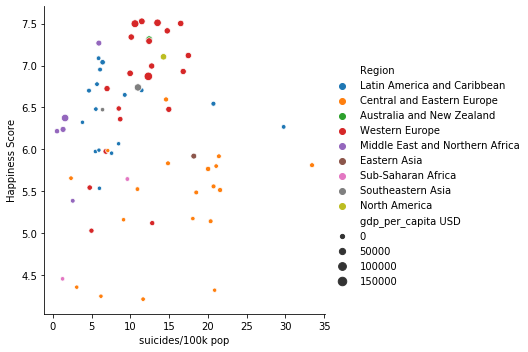

In [110]:
sns.relplot(x='suicides/100k pop', y='Happiness Score',  hue = 'Region', size="gdp_per_capita USD", data=important)

#sns.relplot(x='suicides/100k pop', y='Happiness Score', hue="Fuel Type", size="Fuel Type", data=vehicles)

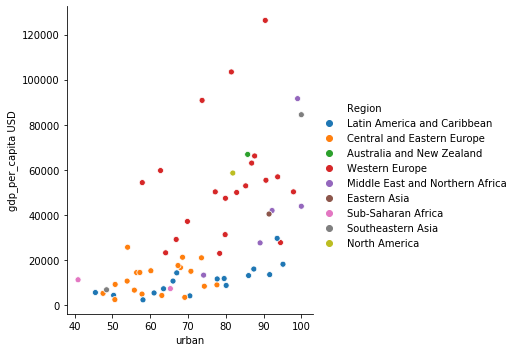

In [116]:
sns.relplot(x='urban', y='gdp_per_capita USD',  hue = 'Region', data=important)


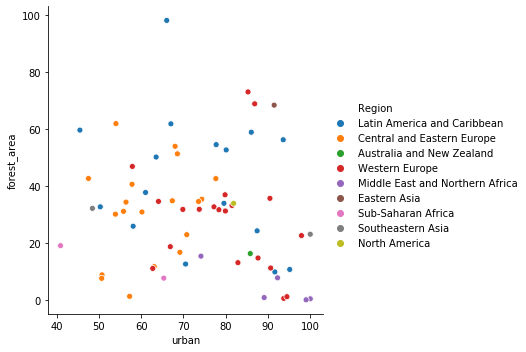

In [135]:
sns.relplot(x='urban', y='forest_area',  hue = 'Region', data=important)


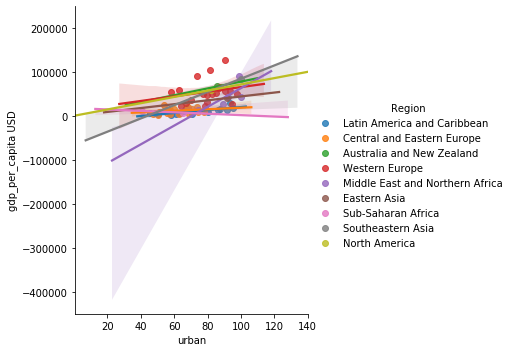

In [136]:
sns.lmplot(x='urban', y='gdp_per_capita USD',  hue = 'Region', data=important)

TypeError: can't multiply sequence by non-int of type 'float'

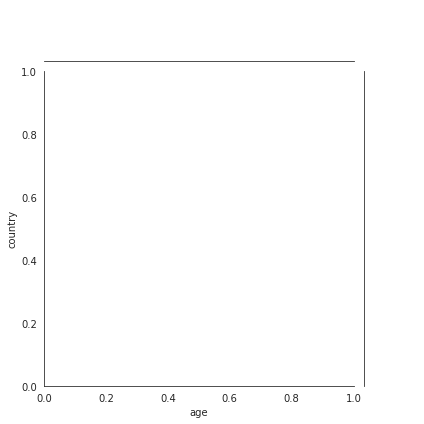

In [146]:
#sns.kdeplot(year2)
#with sns.axes_style('white'):
#    sns.jointplot("age", "country", year2, kind='hex')

sns.kdeplot(year2)